In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from scipy import stats

In [2]:
car_data=pd.read_csv('CarPrice_Assignment.csv',index_col='car_ID')

In [3]:
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
car_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
cols_with_missing=[cols for cols in car_data.columns if car_data[cols].isnull().any()]
cols_with_missing

[]

<AxesSubplot:>

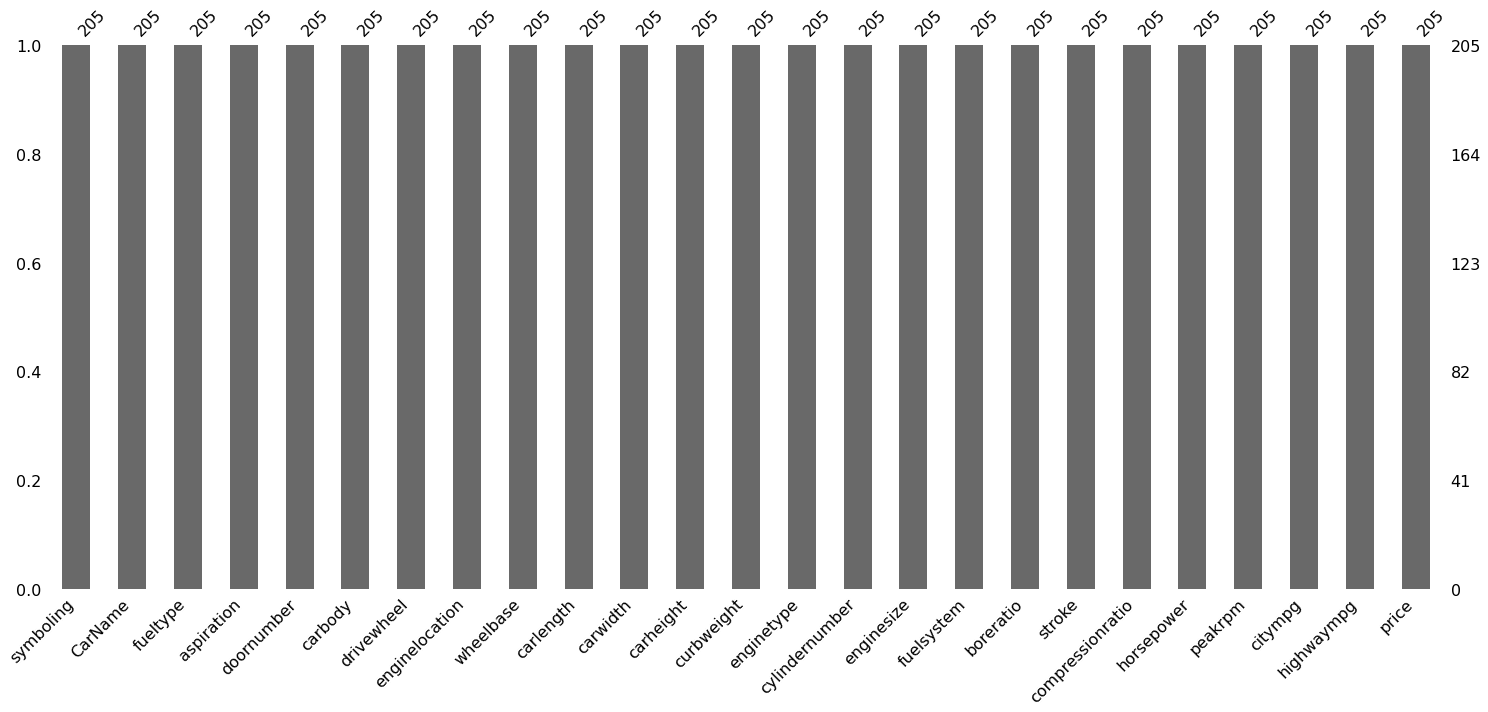

In [7]:
msno.bar(car_data)

No missing Value

In [8]:
car_data.dtypes.value_counts()

object     10
float64     8
int64       7
dtype: int64

<AxesSubplot:>

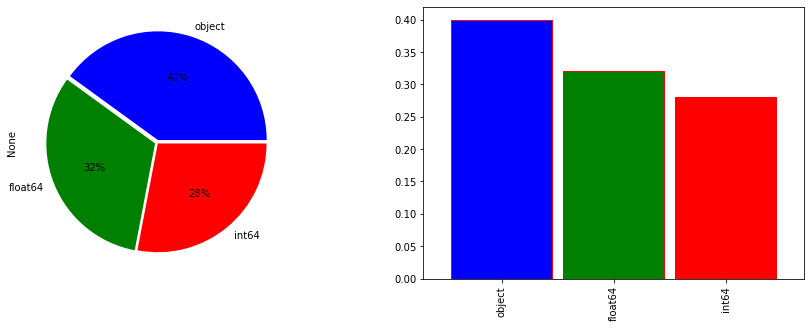

In [9]:
data_types=car_data.dtypes.value_counts(normalize=True)
plt.figure(figsize=(14,8))
plt.subplot(121)
data_types.plot(kind='pie',colors=['blue','green','red'],autopct='%.0f%%',explode=(0.025,0.02,0.01))
plt.subplot(122)
data_types.plot(kind='bar',color=['blue','green','red'],width=0.9,edgecolor='red',figsize=(15,5))

Lets devide our data into two parts, Numerical and Categorical type

1. Numerical Data

In [10]:
num_data=car_data.select_dtypes(include=['int64','float64'])

In [11]:
num_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Whole Data doesn't contain any error so we don;t have to worry about

In [12]:
num_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### Managing Outliers

* Lets see if numerical data have any outlier or not
* Lets try iqr method to find them

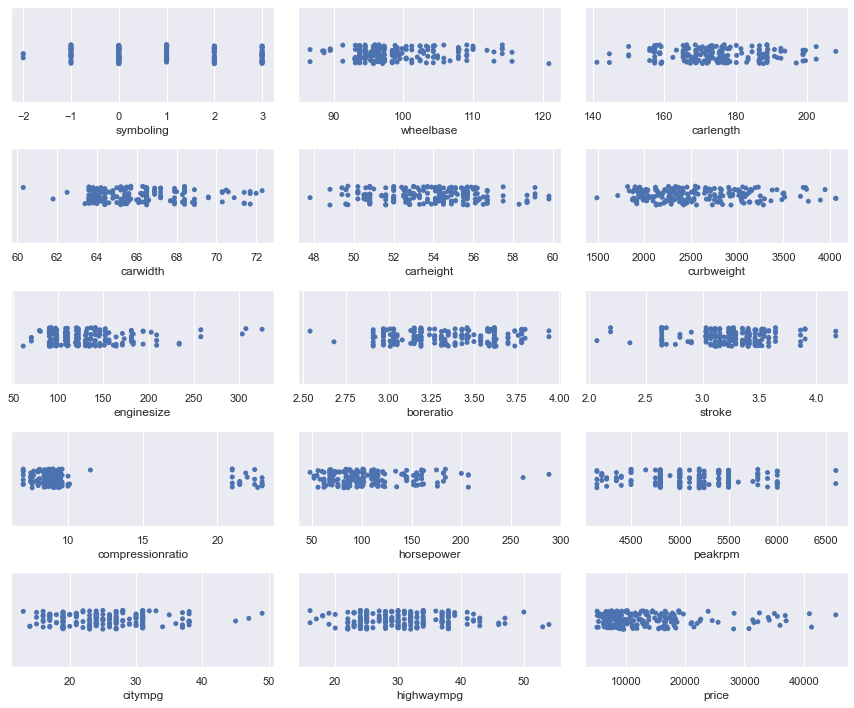

In [13]:
#stripplot
sns.set()
fig=plt.figure(figsize=(12,10))
for i, col in enumerate(num_data):
    ax=fig.add_subplot(5,3,i+1)
    sns.stripplot(x=num_data[col],ax=ax)
fig.tight_layout()
    

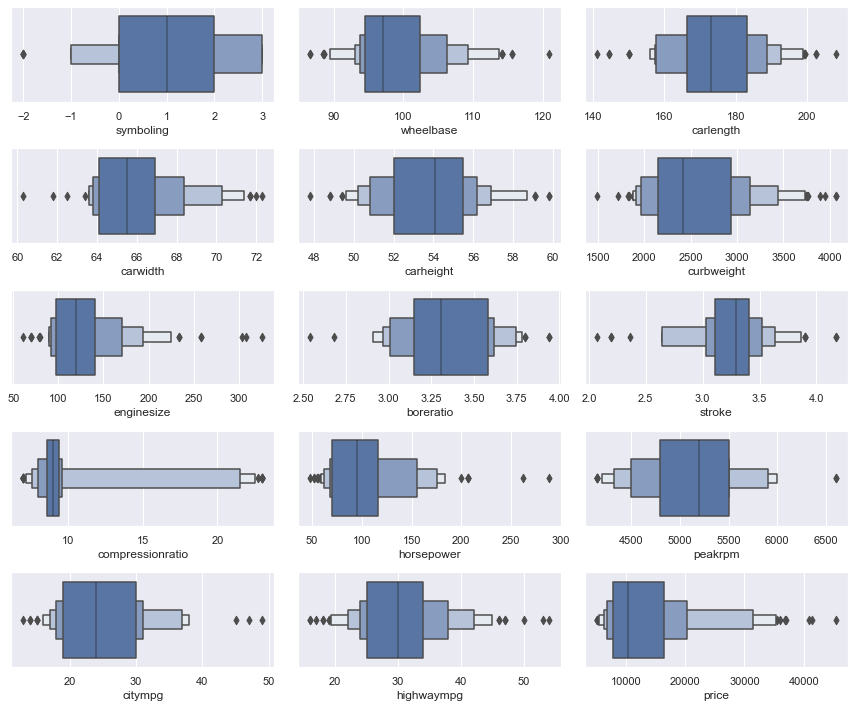

In [14]:
#boxenplot
sns.set()
fig=plt.figure(figsize=(12,10))
for i, col in enumerate(num_data):
    ax=fig.add_subplot(5,3,i+1)
    sns.boxenplot(x=num_data[col],ax=ax)
fig.tight_layout()

In [15]:
def outlier_visualization(var_out,var_no_out):
    fig,ax=plt.subplots(1, 4,figsize=(15,4))
    sns.distplot(var_out,ax=ax[0])
    sns.stripplot(var_out,ax=ax[1])
    sns.boxenplot(var_out,ax=ax[2])
    stats.probplot(var_out, plot=ax[3])
    plt.suptitle('Data with outliers',fontsize=12)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)
    fig.tight_layout()
    plt.show()
    
    #for data without outlierss
    
    fig,ax=plt.subplots(1, 4,figsize=(15,4))
    sns.distplot(var_no_out,ax=ax[0])
    sns.stripplot(var_no_out,ax=ax[1])
    sns.boxenplot(var_no_out,ax=ax[2])
    stats.probplot(var_no_out, plot=ax[3])
    plt.suptitle('Data with outliers',fontsize=12)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)
    fig.tight_layout()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

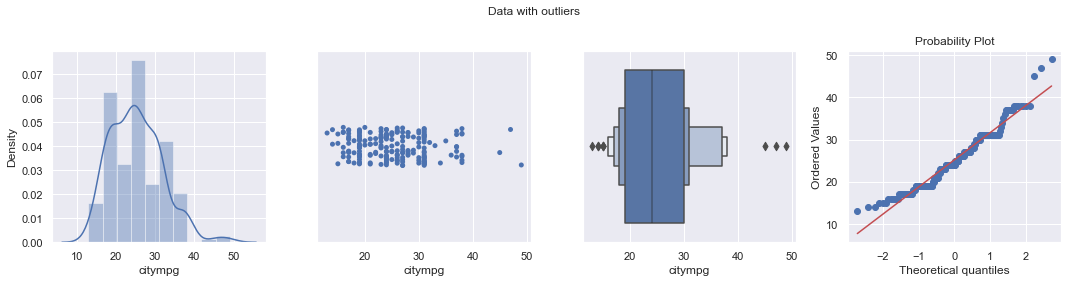

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

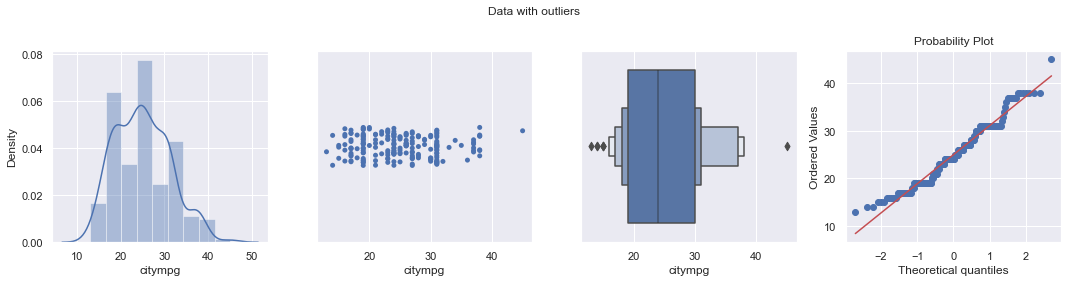

In [16]:
df=num_data.copy()
q1=df['citympg'].quantile(0.25)
q3=df['citympg'].quantile(0.75)
iqr=q3-q1
lower_tail=q1-1.5*iqr
upper_tail=q3+1.5*iqr
df=df[(df['citympg']>lower_tail)&(df['citympg']<upper_tail)]
outlier_visualization(num_data['citympg'],df['citympg'])

##### Univariate Analysis

In [17]:
num_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
# lets see the distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

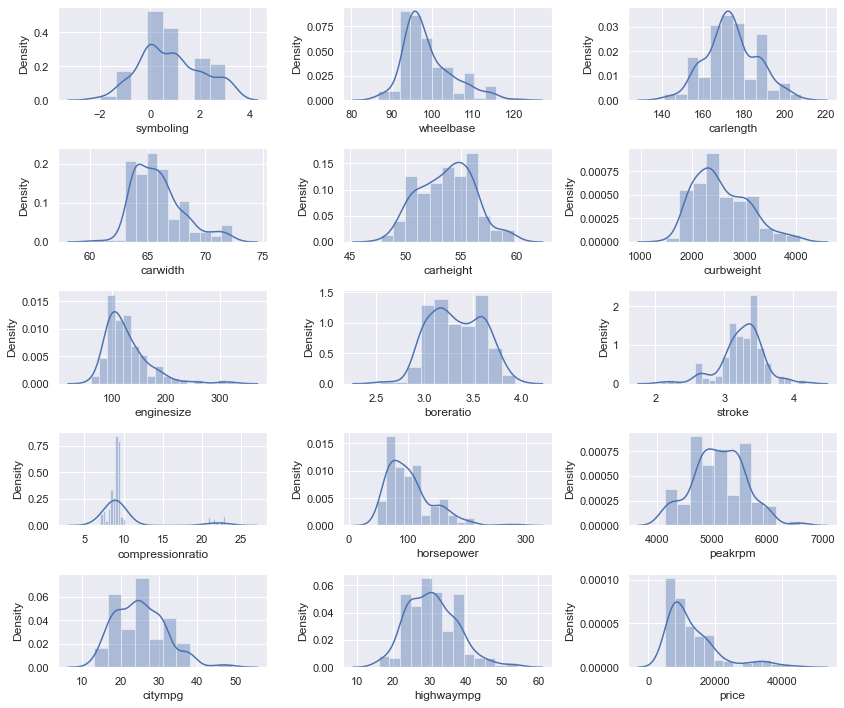

In [19]:
fig=plt.figure(figsize=(12,10))
for i,col in enumerate(num_data):
    ax=fig.add_subplot(5,3,i+1)
    sns.distplot(num_data[col],ax=ax)
fig.tight_layout()

In [20]:
#Lets check the skewness
skew=num_data.skew(skipna=True).sort_values(ascending=False)
skew

compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64

most of the data are positively skewed

2.Categorical Data

In [21]:
categ_data=car_data.select_dtypes(include=['object'])

In [22]:
categ_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [23]:
categ_data.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


Summary
* Most of the car are toyota corona but we have see on later which company is dominant one,
* gas is  dominant fueltype
* most car have four door number
* Most of the car have engine location on front
* std is more common than turbo

In [24]:
for col in categ_data:
    print(f'{col:-<30},{categ_data[col].unique()}')

CarName-----------------------,['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'bu

* Lets find the car company name

In [25]:
#Splitting company name from CarName column
company_names=categ_data['CarName'].apply(lambda x: x.split(' ')[0])
categ_data.insert(1,'company_name',company_names)
categ_data=categ_data.drop('CarName',axis=1)

In [26]:
categ_data.head()

,company_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [27]:
for col in categ_data:
    print(f'{col:-<30},{categ_data[col].unique()}')

company_name------------------,['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
fueltype----------------------,['gas' 'diesel']
aspiration--------------------,['std' 'turbo']
doornumber--------------------,['two' 'four']
carbody-----------------------,['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel--------------------,['rwd' 'fwd' '4wd']
enginelocation----------------,['front' 'rear']
enginetype--------------------,['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber----------------,['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem--------------------,['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


There seems to be repeated company names and the duplicated name of company are actually wrong spelled

In [28]:
categ_data['company_name']=categ_data['company_name'].str.lower()

In [29]:
def replace_name(a,b):
    categ_data['company_name'].replace(a,b,inplace=True)

In [30]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [31]:
categ_data['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [32]:
def value_counts(col):
    a=categ_data[col].value_counts()
    return(a)
value=[]
for colm in categ_data:
    values=value_counts(colm)
    value.append(values)

In [33]:
value

[toyota         32
 nissan         18
 mazda          17
 mitsubishi     13
 honda          13
 volkswagen     12
 subaru         12
 peugeot        11
 volvo          11
 dodge           9
 buick           8
 bmw             8
 audi            7
 plymouth        7
 saab            6
 porsche         5
 isuzu           4
 jaguar          3
 chevrolet       3
 alfa-romero     3
 renault         2
 mercury         1
 Name: company_name, dtype: int64,
 gas       185
 diesel     20
 Name: fueltype, dtype: int64,
 std      168
 turbo     37
 Name: aspiration, dtype: int64,
 four    115
 two      90
 Name: doornumber, dtype: int64,
 sedan          96
 hatchback      70
 wagon          25
 hardtop         8
 convertible     6
 Name: carbody, dtype: int64,
 fwd    120
 rwd     76
 4wd      9
 Name: drivewheel, dtype: int64,
 front    202
 rear       3
 Name: enginelocation, dtype: int64,
 ohc      148
 ohcf      15
 ohcv      13
 dohc      12
 l         12
 rotor      4
 dohcv      1
 Name: en

Visualising Categorical Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

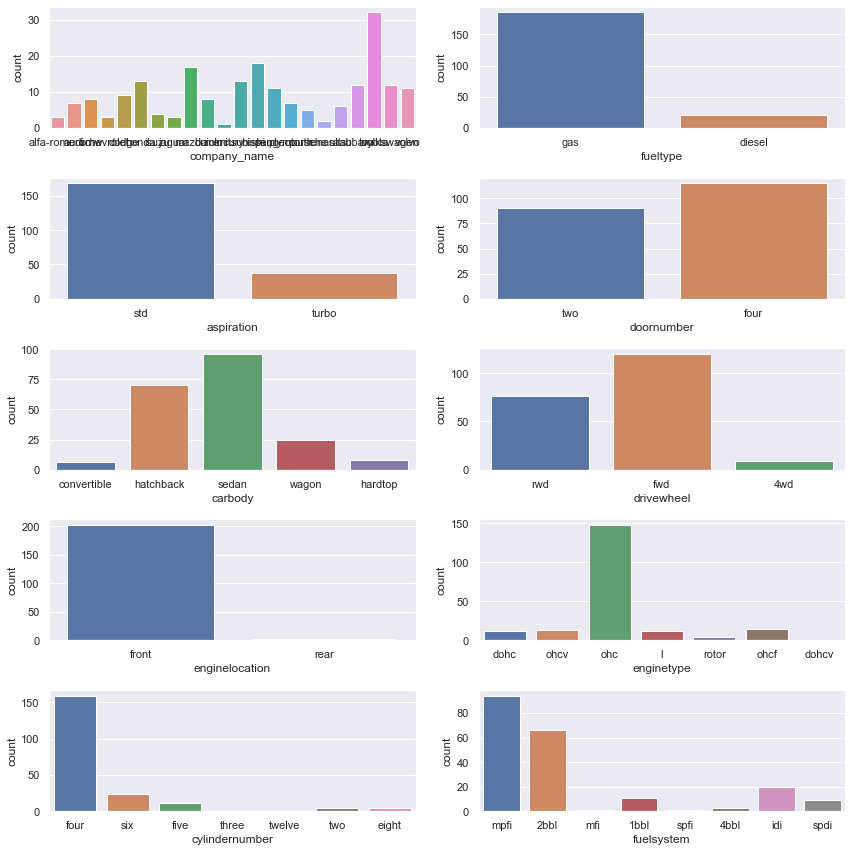

In [34]:
fig=plt.figure(figsize=(12,12))
for i,col in enumerate(categ_data):
    ax=fig.add_subplot(5,2,i+1)
    sns.countplot(categ_data[col])
fig.tight_layout()
plt.show()


we cant properly see the company name on countplot so lets see on barplot

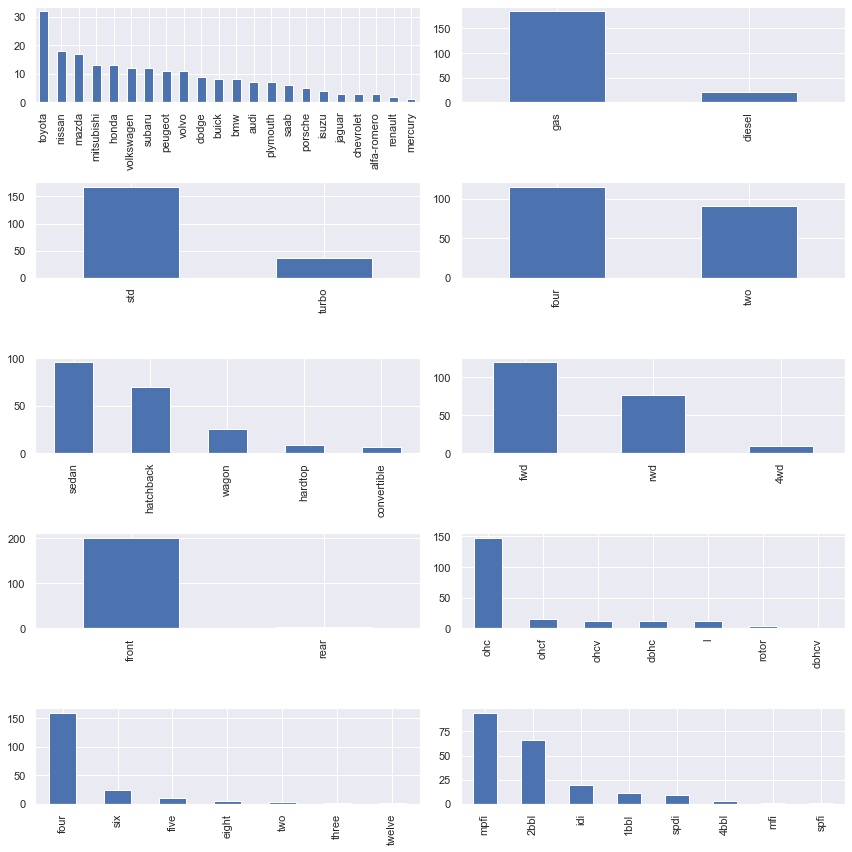

In [35]:
fig=plt.figure(figsize=(12,12))
for i,col in enumerate(categ_data):
    ax=fig.add_subplot(5,2,i+1)
    categ_data[col].value_counts().plot(kind='bar')
fig.tight_layout()
plt.show()


Car whose engine is located on rear and whose cylindernumber is 3 and 12 not clearly seen on the neither on countplot nor on barplot so lets see categorical fetaure on donut chart

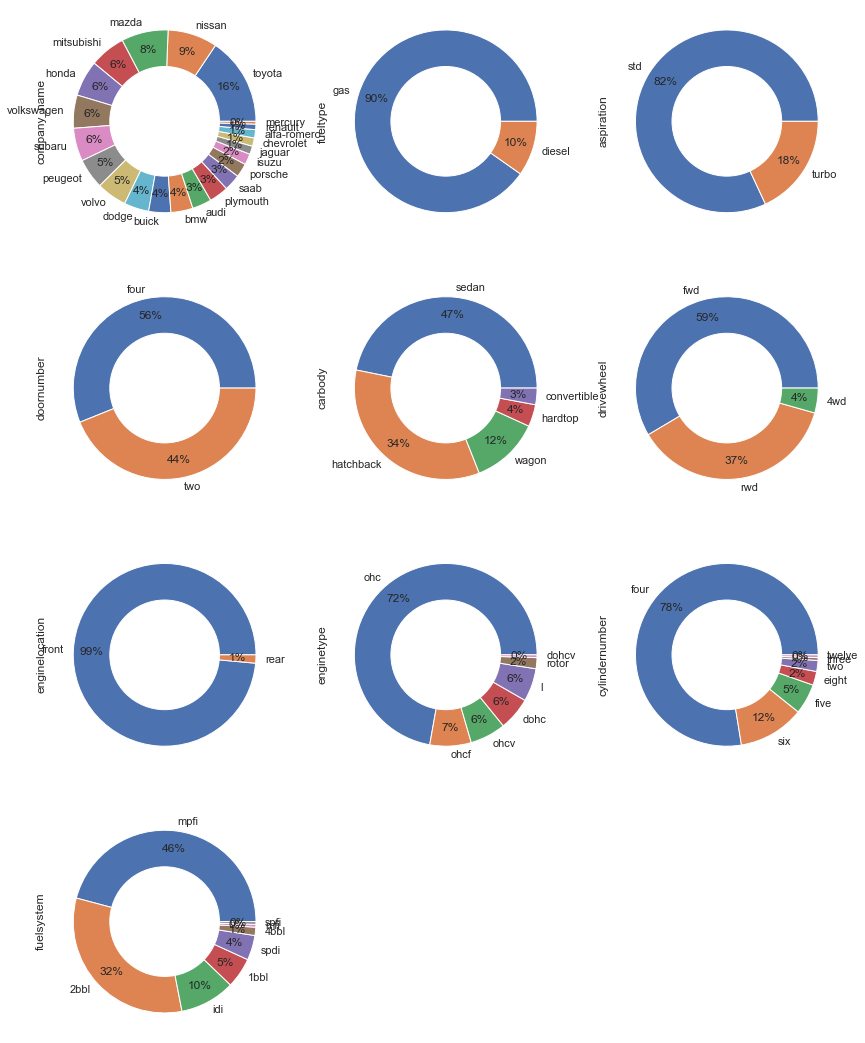

In [36]:
fig=plt.figure(figsize=(12,15))
for i, col in enumerate(categ_data):
    ax=fig.add_subplot(4,3,i+1)
    categ_data[col].value_counts().plot(kind='pie',autopct='%.0f%%',pctdistance=0.8)
    #lets plot cirlce inside pie
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig1 = plt.gcf()
    # Adding Circle in Pie chart
    fig1.gca().add_artist(centre_circle)
fig.tight_layout()
plt.show()

Bivariate Analysis

Numerical-Numerical Analysis

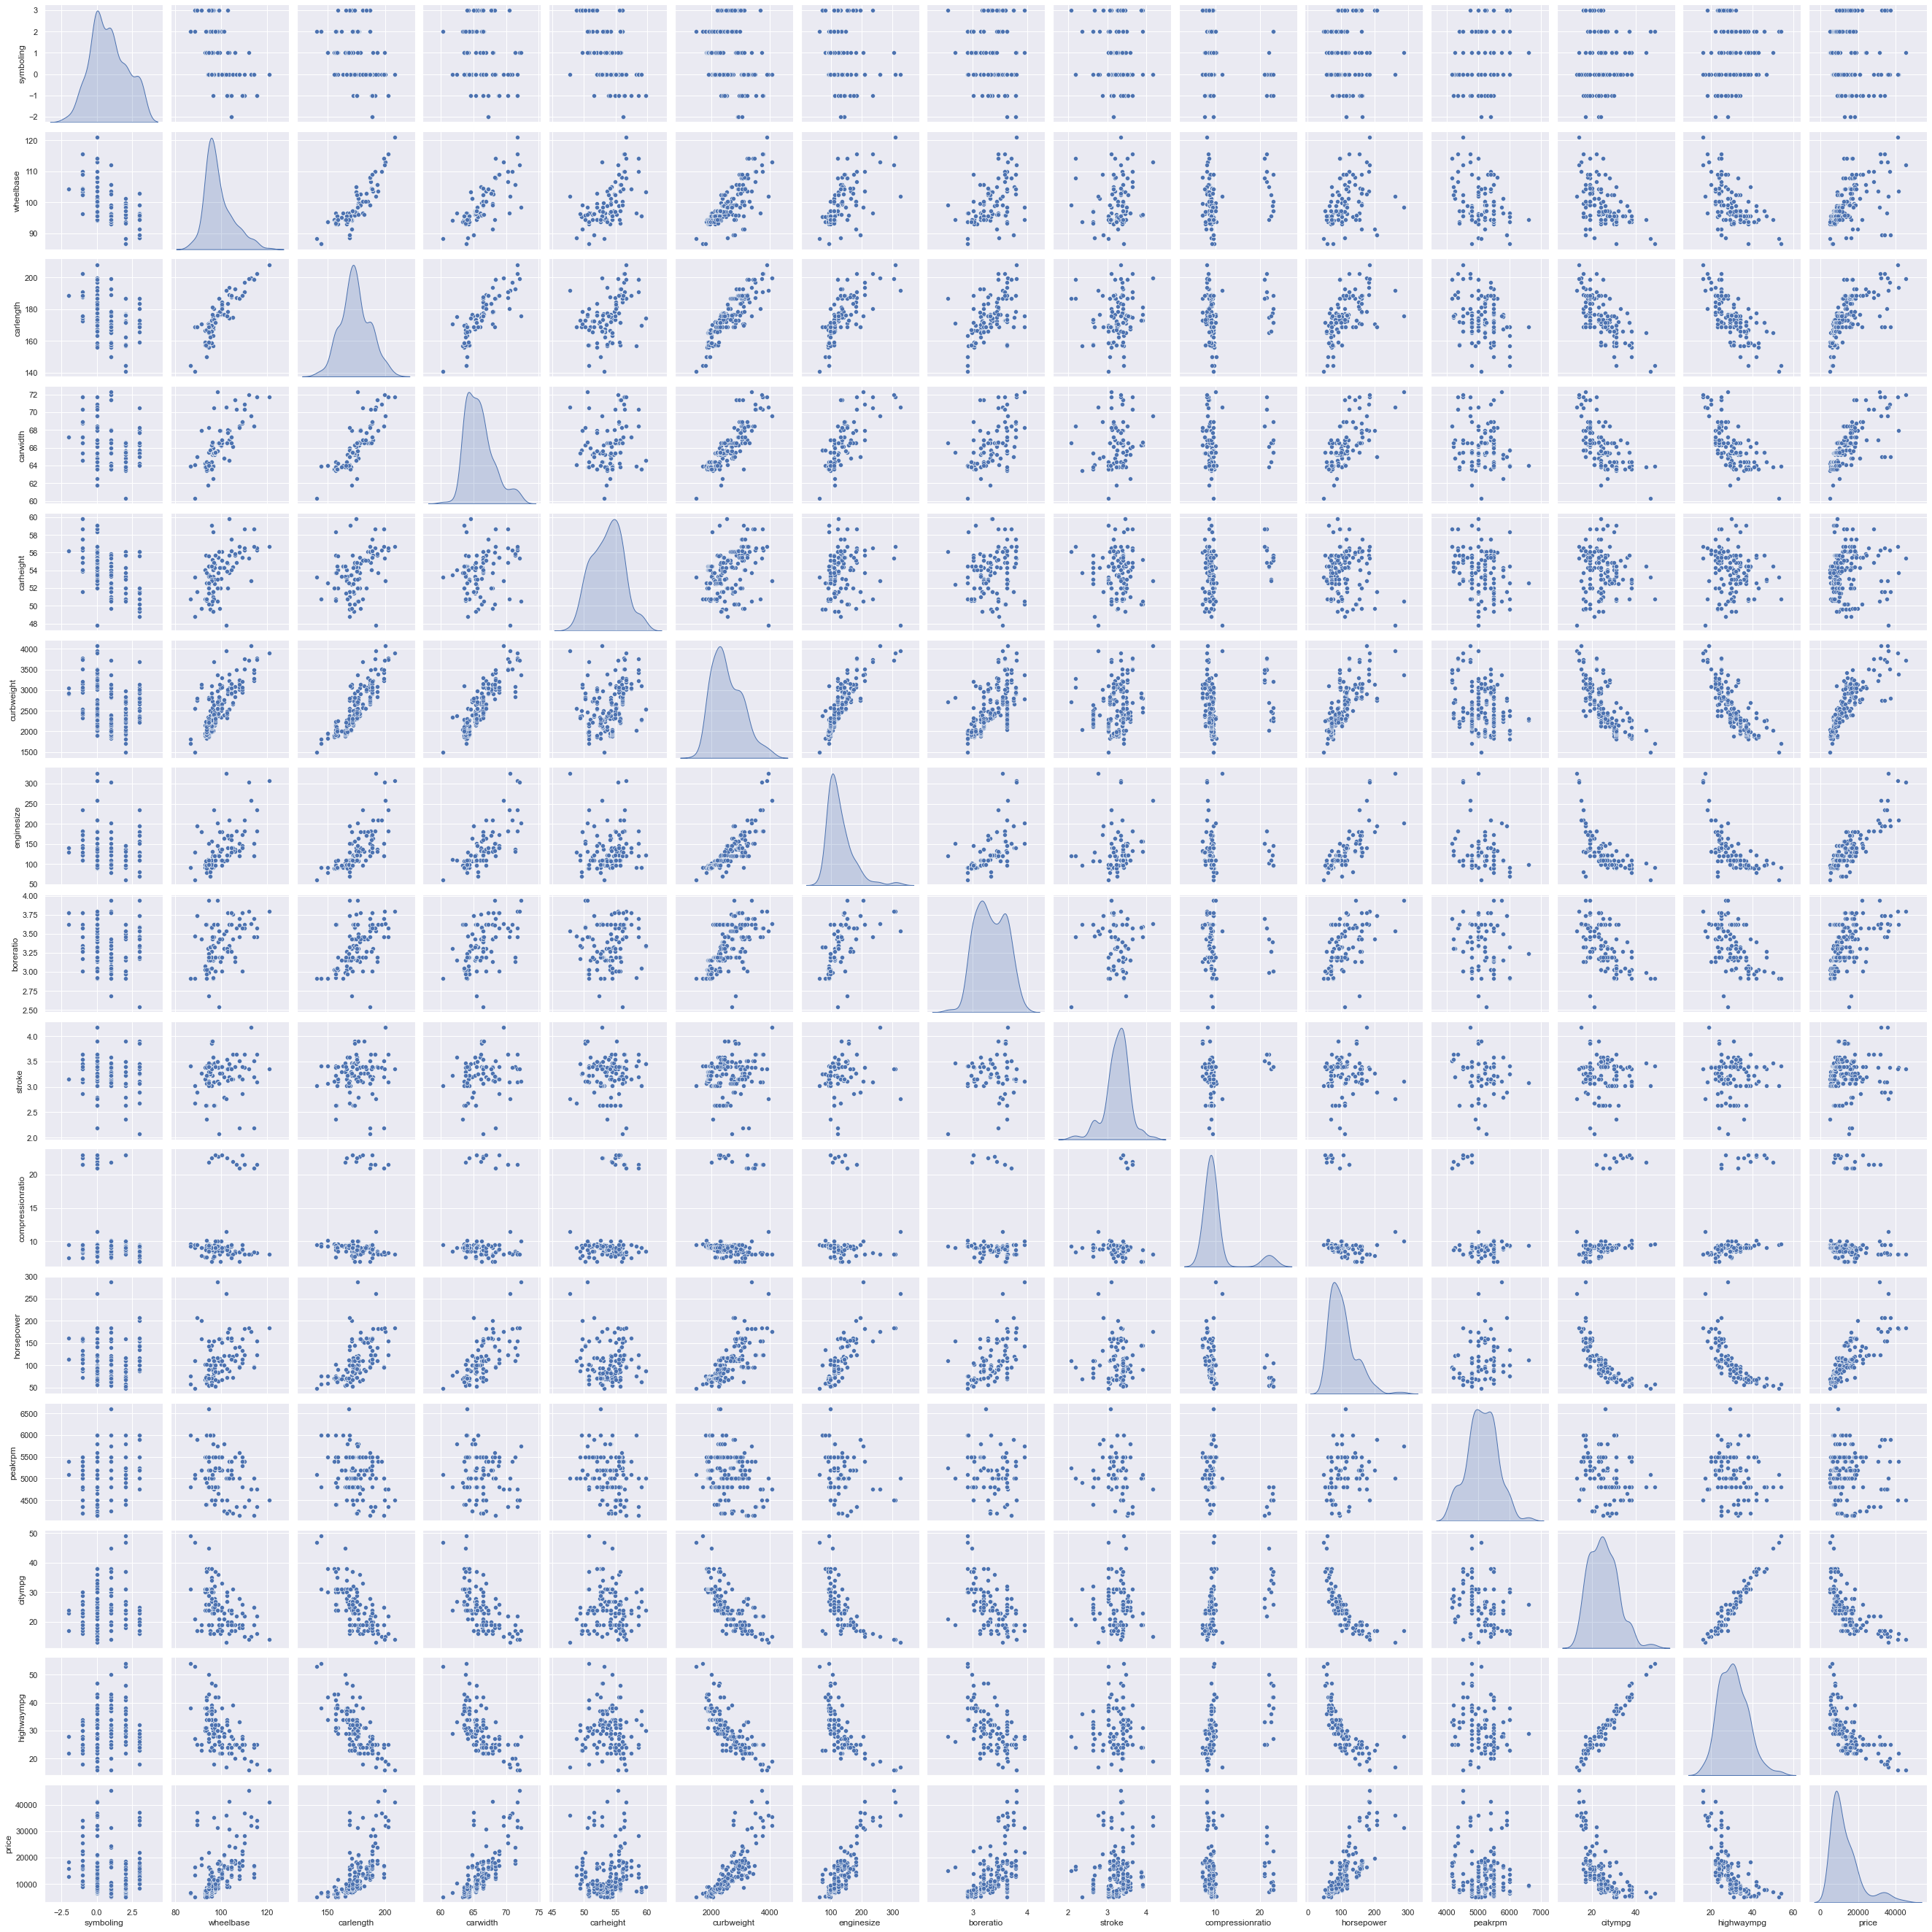

In [37]:
#pairplot
sns.pairplot(num_data,diag_kind='kde')

In [38]:
corr=num_data.corr()

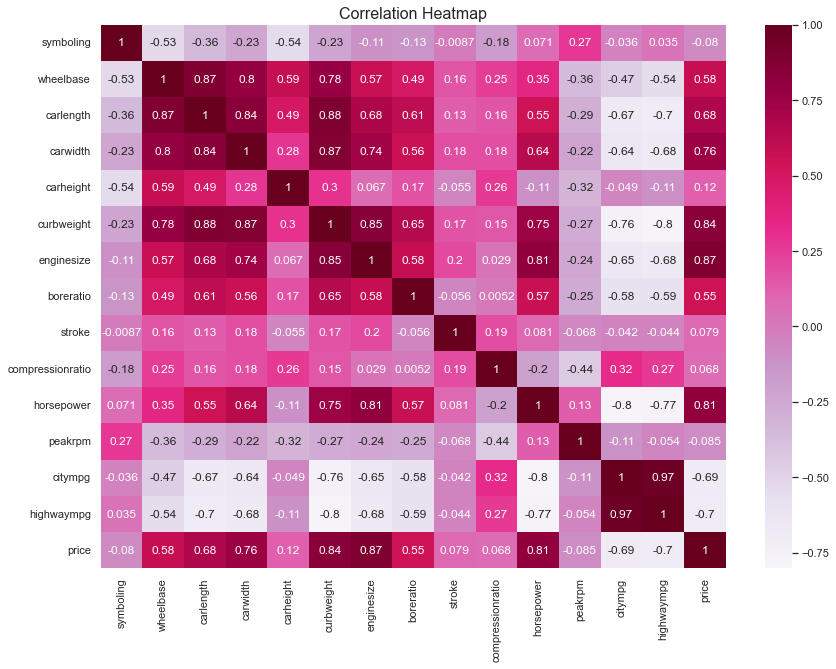

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cmap='PuRd')
plt.title("Correlation Heatmap",fontsize=16)
plt.show()

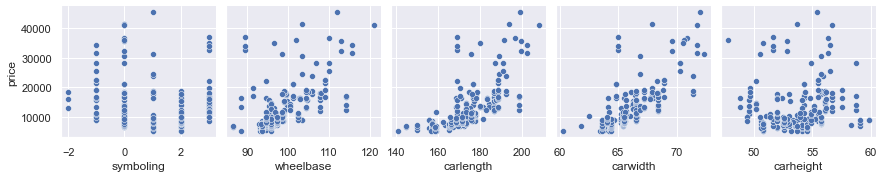

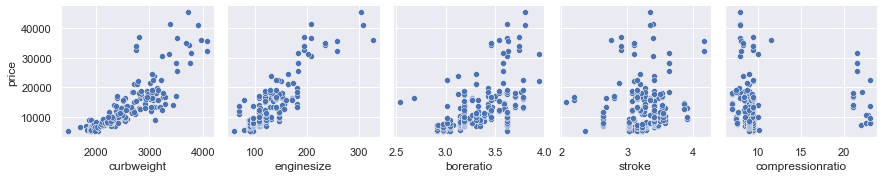

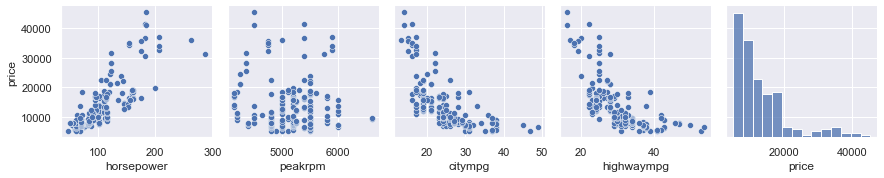

In [40]:
for i in range(0,len(num_data.columns),5):
    sns.pairplot(data=num_data,x_vars=num_data.columns[i:i+5],y_vars='price')

We can clearly see the feature like carlength,carwidth, curbweight, enginesize, horsepower are very much positively related where as citympg and highwaympg are highly negatively correlated with price

In [41]:
df=car_data.copy()
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['pricerange'] = pd.cut(df['price'],bins,right=False,labels=cars_bin)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pricerange
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium


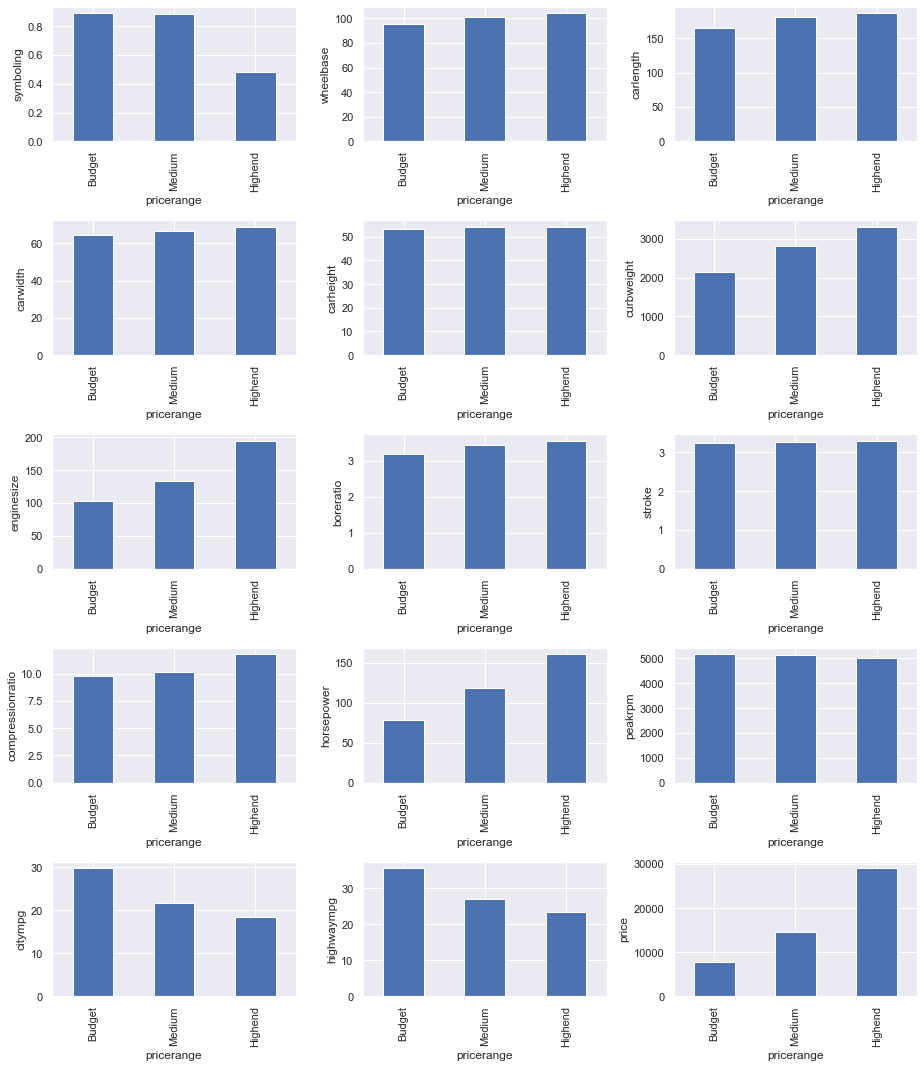

In [42]:
fig=plt.figure(figsize=(13,15))
for i,col in enumerate(num_data):
    ax=fig.add_subplot(5,3,i+1)
    df.groupby(['pricerange'])[col].mean().plot(kind='bar')
    ax.set_ylabel(col)
fig.tight_layout()
plt.show()

From this plot we can see that price range vs numerical data relationship

In [43]:
num_data.corr()['price'][:-1].sort_values(ascending=False)

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Most significant numerical features for car price prediction are
* enginesize
* curbweight
* horsepower
* carwidth
* carlength
* wheelbase
* boreratio
* peakrpm
* citympg
* highwaympg



##### Now Lets see how categorical features are realetd with price


In [44]:
categ_data.columns

Index(['company_name', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [45]:
data=pd.concat([num_data,categ_data],axis=1)

In [46]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,company_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


lets see does company name can impact the price of car

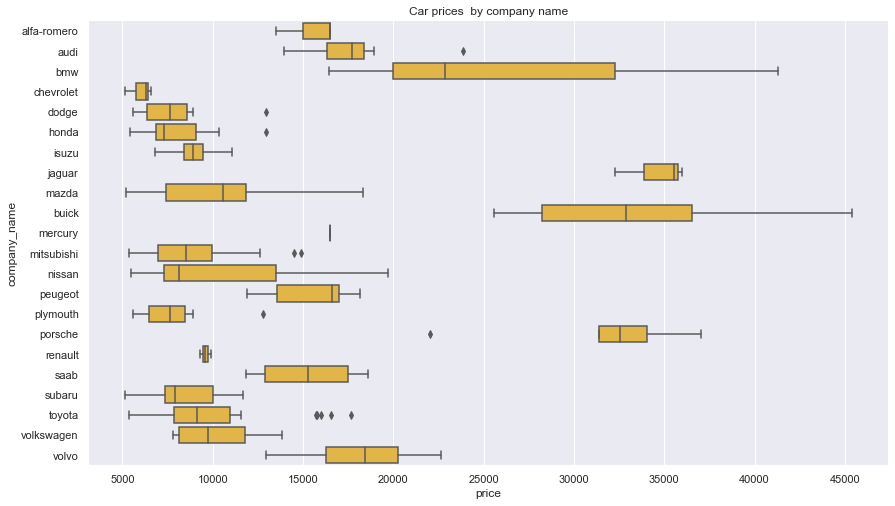

In [47]:
sns.catplot(x='price',
           y='company_name',
           kind='box',
           height = 7,
           aspect = 1.8,
           color = "#FBC02D",
           data=data).set(title = "Car prices  by company name");

Car from company like bmw, jaguar, buick, porsche has relatively higher price than other so definately car company name effect the price

similary we can see for other categorcal features

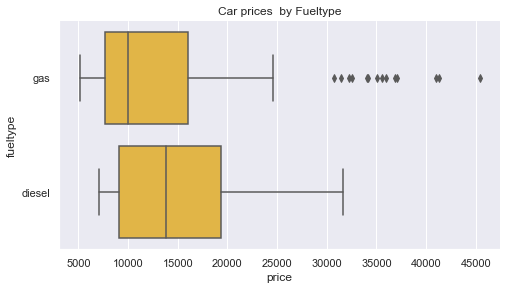

In [48]:
sns.catplot(x='price',
           y='fueltype',
           kind='box',
           height = 4,
           aspect = 1.8,
           color = "#FBC02D",
           data=data).set(title = "Car prices  by Fueltype");

Lets see mean price of gas vs diesel

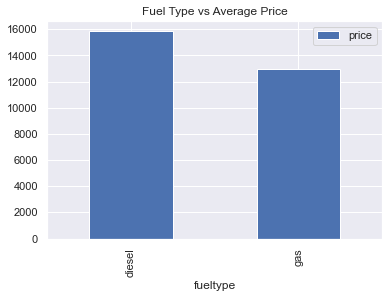

In [49]:
df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

diesal car has slightly higher average price than gas car

In [50]:
categ_data.columns

Index(['company_name', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

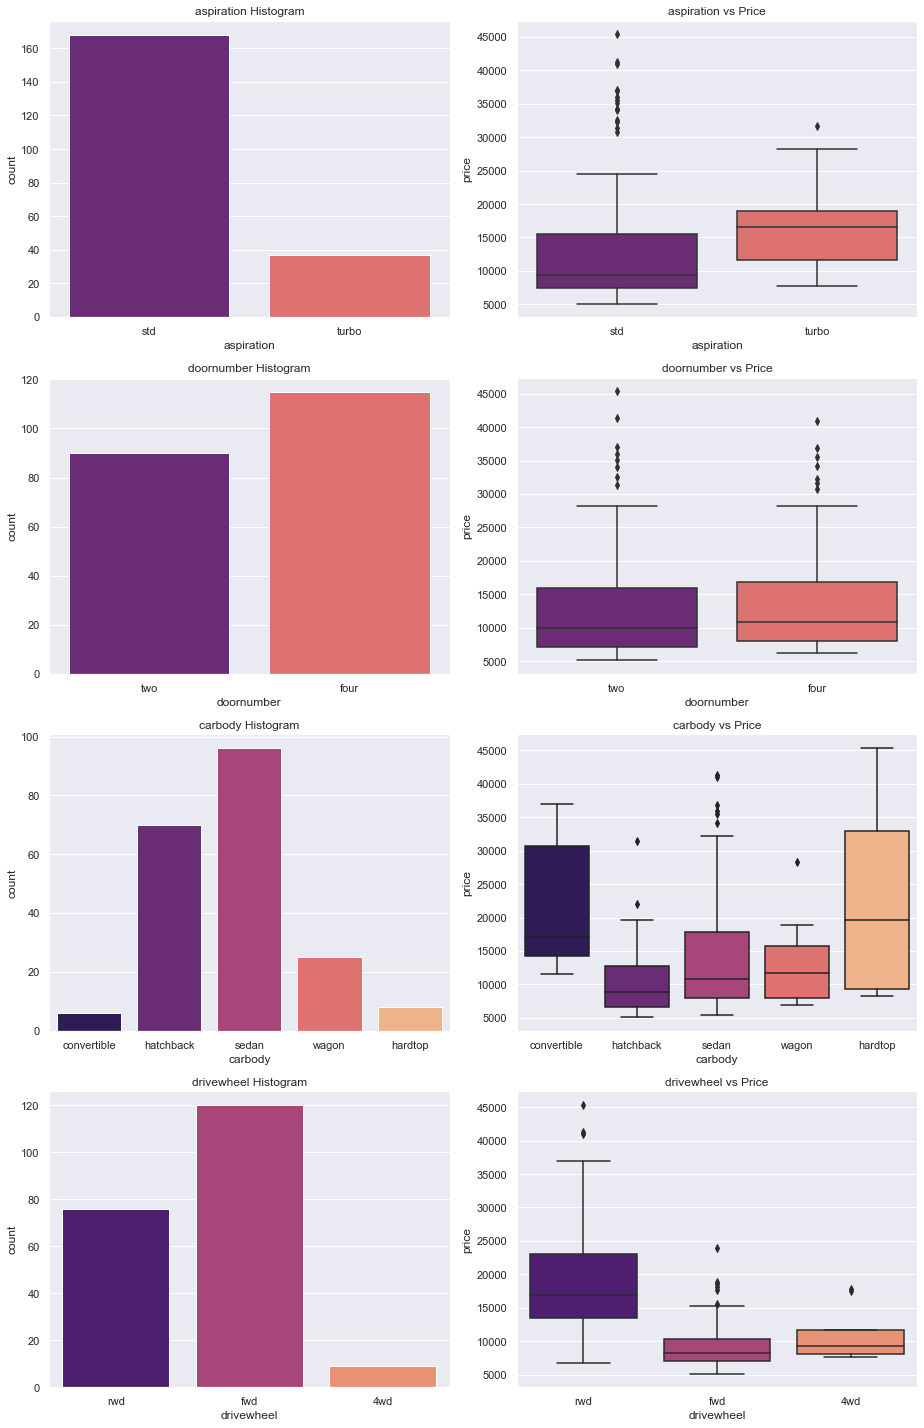

In [51]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("magma"))
    
plt.figure(figsize=(13,20))

plot_count('aspiration', 1)
plot_count('doornumber', 3)
plot_count('carbody', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

* Aspiration doesn't provide enought variability on price so I am not going to use it
* door number vs price is almost same for 2 and 4 door.
* Most of the carbody type are sedan and hatchback
* drivewheel can be significant factor for price prediction

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

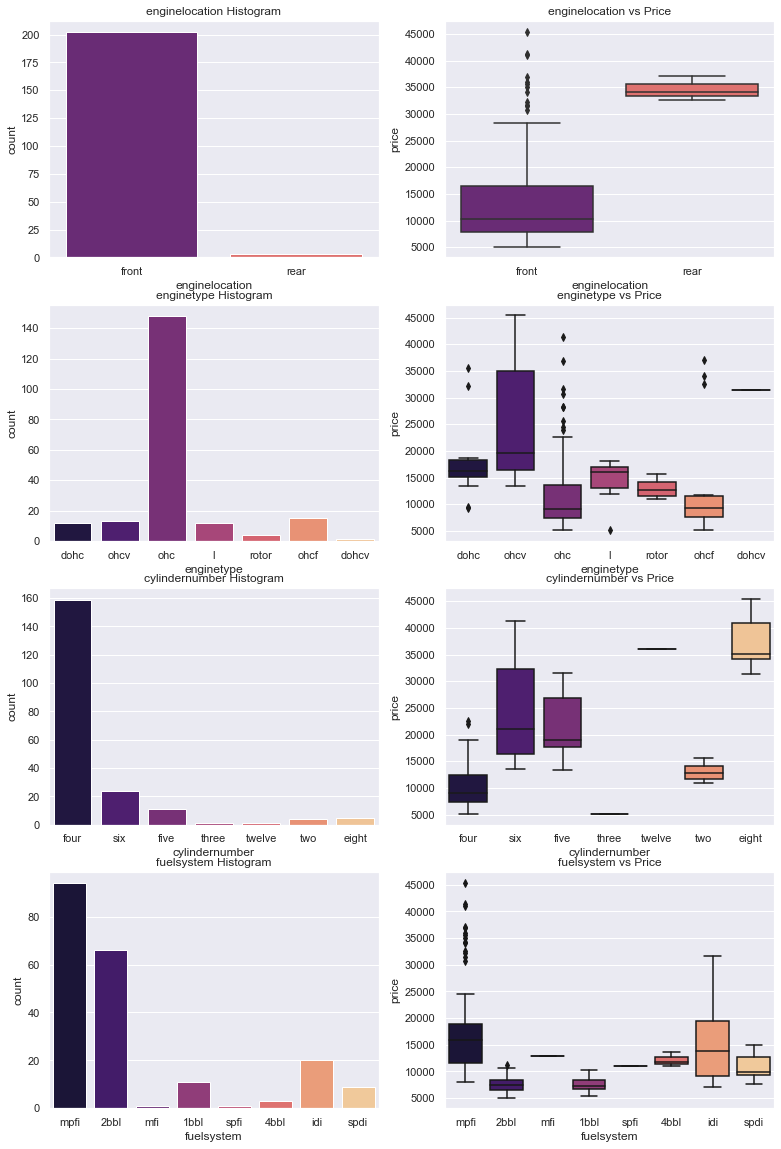

In [52]:
plt.figure(figsize=(13,20))
plot_count('enginelocation', 1)
plot_count('enginetype', 3)
plot_count('cylindernumber', 5)
plot_count('fuelsystem', 7)

* front enginelocation is dominant so this makes categories to make an inference.
* Most common type of enginetype is ohc.
* Most car have Four,Six, five cylinder number.
* mpfi, 2bbl is most common types of fuelsystem

Now I am sorting the categorical features which will be significant for price prediction
* Company Name(company_name)
* fueltype
* carbody
* drivewheel
* enginelocation
* enginetype
* cylindernumber
* fuelsystem

In [53]:
data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'company_name', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [54]:
df_car=data[['curbweight','horsepower','carwidth','carlength','wheelbase','boreratio','peakrpm','citympg','highwaympg',
             'company_name','fueltype','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','price']]

In [55]:
df_car.head()

,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,peakrpm,citympg,highwaympg,company_name,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
car_ID,,,,,,,,,,,,,,,,,,
1,2548,111,64.1,168.8,88.6,3.47,5000,21,27,alfa-romero,gas,convertible,rwd,front,dohc,four,mpfi,13495.0
2,2548,111,64.1,168.8,88.6,3.47,5000,21,27,alfa-romero,gas,convertible,rwd,front,dohc,four,mpfi,16500.0
3,2823,154,65.5,171.2,94.5,2.68,5000,19,26,alfa-romero,gas,hatchback,rwd,front,ohcv,six,mpfi,16500.0
4,2337,102,66.2,176.6,99.8,3.19,5500,24,30,audi,gas,sedan,fwd,front,ohc,four,mpfi,13950.0
5,2824,115,66.4,176.6,99.4,3.19,5500,18,22,audi,gas,sedan,4wd,front,ohc,five,mpfi,17450.0


In [56]:
df_num=df_car.select_dtypes(include=['int64','float64'])

In [57]:
df_categ=df_car.select_dtypes(include=['object'])

In [58]:
df_categ.columns

Index(['company_name', 'fueltype', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [59]:
categ_data_dummies=pd.get_dummies(df_categ,columns=df_categ.columns,drop_first=True)

In [60]:
car_df=pd.concat([df_num,categ_data_dummies],axis=1)
car_df.head()

,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,peakrpm,citympg,highwaympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,2548,111,64.1,168.8,88.6,3.47,5000,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
2,2548,111,64.1,168.8,88.6,3.47,5000,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,2823,154,65.5,171.2,94.5,2.68,5000,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
4,2337,102,66.2,176.6,99.8,3.19,5500,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
5,2824,115,66.4,176.6,99.4,3.19,5500,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


#### Machine Learning

Now our data is ready for training first we need to import some libraries 

In [61]:
#Dividing data into X and y variables
Y=car_df.price
X=car_df.drop('price',axis=1)

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

I am going to use randomized search and grid search for hyperparameter tuning

#### Random Forest

1. Randomized Search for Ramdom Forest

In [63]:
acc={}
rf = RandomForestRegressor(random_state = 42)

In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 50, num = 6)]

In [65]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [66]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]

In [67]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [68]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [69]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [70]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 20, cv = 3,
                               verbose=2, random_state=42,
                               n_jobs = -1)

In [72]:
rf_random.fit(X, Y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 26, 32, 38, 44,
                                                         50]},
                   random_state=42, verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 38,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [74]:
def evaluate(model,x,y):
    predictions=model.predict(x)
    errors=abs(predictions-y)
    mape=100*np.mean(errors/y)
    accuracy=100-mape
    r_squred=model.score(x,y)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R^2 value={}%'.format(round(100*r_squred),2))
    return accuracy

In [75]:
best_random=rf_random.best_estimator_
random_accuracy=evaluate(best_random,X,Y)
acc['Random_forest/random_search']=random_accuracy

Model Performance
Average Error: 879.6725 degrees.
Accuracy = 93.39%.
R^2 value=97%


2. Grid Search Random Forest

In [76]:
rf_random.best_params_

{'n_estimators': 38,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

Lets create grid search based on previous random search

In [77]:
param_grid={'bootstrap':[True],
           'max_depth':[20,30,40],
           'max_features':['sqrt'],
           'min_samples_leaf':[1,2,3],
           'min_samples_split':[3,5,7],
           'n_estimators':[35,40,45]}

In [78]:
# Create a based model
rf = RandomForestRegressor()

In [79]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,
                        n_jobs=-1,verbose=2)

In [80]:
grid_search.fit(X,Y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [35, 40, 45]},
             verbose=2)

In [81]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 45}

In [82]:
best_gridsearch=grid_search.best_estimator_
gridsearch_accurcay=evaluate(best_gridsearch,X,Y)
acc['Grid_search/Random_forest']=(gridsearch_accurcay)

Model Performance
Average Error: 978.6275 degrees.
Accuracy = 92.64%.
R^2 value=96%


#### XgBoost

In [83]:
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [84]:
model_xgb = XGBRegressor()

In [85]:
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = parameters, 
                          cv = 3,n_jobs=-1,verbose=2)

In [86]:
grid_search_xgb.fit(X,Y)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...ta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                     

In [87]:
grid_search_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}

In [88]:
best_xgb=grid_search_xgb.best_estimator_
xgb_accuracy=evaluate(best_xgb,X,Y)
acc['XGB_Accuracy']=(xgb_accuracy)

Model Performance
Average Error: 1453.9701 degrees.
Accuracy = 89.89%.
R^2 value=93%


#### K-Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
parameters = {
    "weights": ["uniform", "distance"],
}

In [91]:
model_k_neighbors = KNeighborsRegressor()

In [92]:
model_k_neighbors = GridSearchCV(estimator = model_k_neighbors, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [93]:
model_k_neighbors.fit(X,Y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'weights': ['uniform', 'distance']}, verbose=2)

In [94]:
model_k_neighbors.best_params_

{'weights': 'uniform'}

In [95]:
best_model=model_k_neighbors.best_estimator_
k_neighbors_accuracy=evaluate(best_model,X,Y)
acc['KNN_Accuracy']=(k_neighbors_accuracy)

Model Performance
Average Error: 1632.9382 degrees.
Accuracy = 88.85%.
R^2 value=90%


#### Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm=LinearRegression()

In [98]:
lm.fit(X,Y)

LinearRegression()

In [99]:
lm_accuracy=evaluate(lm,X,Y)
acc['Linear_regression_accuracy']=(lm_accuracy)

Model Performance
Average Error: 1123.2203 degrees.
Accuracy = 90.75%.
R^2 value=96%


Now lets choose the best model based on above calculation

In [100]:
pd.DataFrame(acc,index=['Accuracy']).T

,Accuracy
Random_forest/random_search,93.391125
Grid_search/Random_forest,92.643052
XGB_Accuracy,89.892426
KNN_Accuracy,88.845565
Linear_regression_accuracy,90.750894


We can see that Random Forest with random search perform better than others so I am going to use 1st one (Rf/Rs)

In [101]:
y_pred=rf_random.predict(X)
model=pd.DataFrame({'Actual Price':Y,
                  'Predicted Price':y_pred})

In [102]:
model

,Actual Price,Predicted Price
car_ID,,
1,13495.0,14524.934534
2,16500.0,14524.934534
3,16500.0,17012.409539
4,13950.0,12928.953258
5,17450.0,17169.055509
...,...,...
201,16845.0,17618.014265
202,19045.0,20465.556140
203,21485.0,19988.911796


In [103]:
final_data=pd.concat([data,model],axis=1)

In [104]:
final_data=final_data.drop('price',axis=1)

In [105]:
final_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Actual Price,Predicted Price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0,14524.934534
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0,14524.934534
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0,17012.409539
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0,12928.953258
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0,17169.055509


Lets save our data and I will visualize our result in power BI

In [106]:
final_data.to_csv('final_data_model.csv')

Model Visualisation is done on Power BI 
* link: https://app.powerbi.com/groups/me/reports/ea01ce04-575a-453c-b39d-d83787f48a6b?ctid=906b5bc9-4e88-47e9-ba74-8869d0268f9d&pbi_source=linkShare